In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [2]:
os.chdir(r'C:\Users\USER\Desktop\Datasets')

In [3]:
columns=["Sepal_length","SepalWidth","Petallength","PetalWidth","Species"]
data=pd.read_csv('iris-missing.csv',names=columns)

In [4]:
data.head()

,Sepal_length,SepalWidth,Petallength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal_length    150 non-null float64
SepalWidth      150 non-null object
Petallength     150 non-null object
PetalWidth      150 non-null object
Species         150 non-null object
dtypes: float64(1), object(4)
memory usage: 6.0+ KB


In [6]:
data.replace('  ',np.nan,inplace=True)

In [7]:
# Changing the data types
conv_dic={'Sepal_length':float,'SepalWidth':float,'Petallength':float,'PetalWidth':float}
data=data.astype(conv_dic)
data['Species']=data.Species.astype('category')

In [8]:
data.dtypes

Sepal_length     float64
SepalWidth       float64
Petallength      float64
PetalWidth       float64
Species         category
dtype: object

In [9]:
# Checking missing values
data.isnull().sum()

Sepal_length    0
SepalWidth      2
Petallength     9
PetalWidth      8
Species         0
dtype: int64

In [10]:
data.describe()

,Sepal_length,SepalWidth,Petallength,PetalWidth
count,150.000000,148.000000,141.000000,142.000000
mean,5.843333,3.055405,3.754610,1.197887
std,0.828066,0.436324,1.763052,0.770140
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


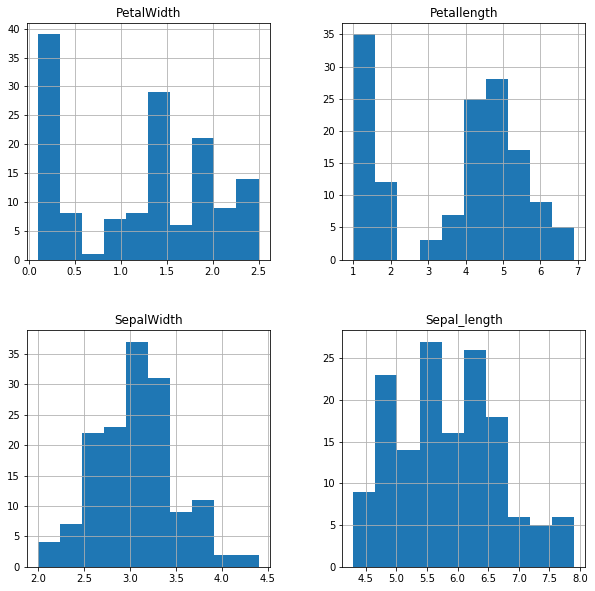

In [11]:
histogram=data.hist(figsize=(10,10))

In [12]:
data["SepalWidth"].fillna(data["SepalWidth"].mean(),inplace=True)
data["Petallength"].fillna(data["Petallength"].mean(),inplace=True)
data["PetalWidth"].fillna(data["PetalWidth"].mean(),inplace=True)

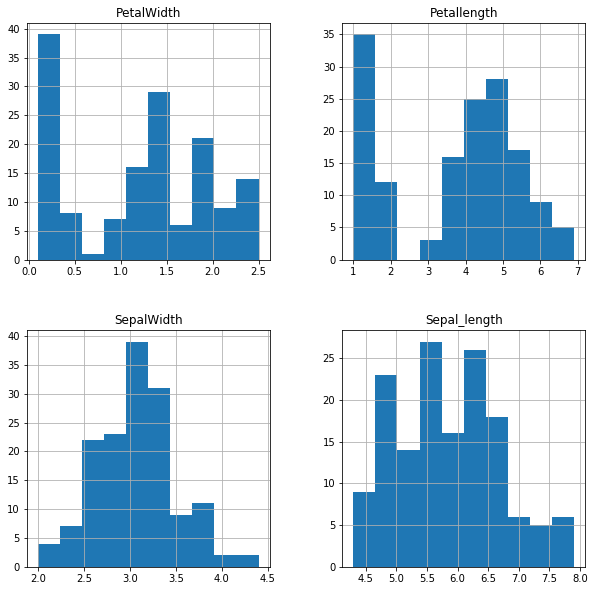

In [13]:
histogram=data.hist(figsize=(10,10))

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64


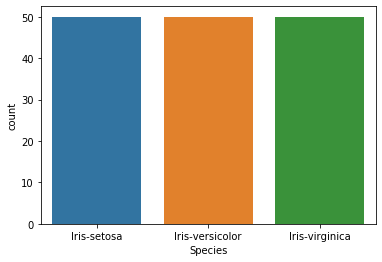

In [14]:
# Class distribution
print(data["Species"].value_counts())
sns.countplot(data["Species"])

In [15]:
# Seperating dependent and independent variable
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

In [16]:
# Encoding the output
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y=le.fit_transform(Y)

In [17]:
# Splitting the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state =0)

In [18]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#  KNN

In [19]:
# Fitting clasifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Fitting the model
test_scores=[]
for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    test_scores.append(knn.score(X_test,y_test))
    
max_test_score = max(test_scores)
test_scores_ind = test_scores.index(max_test_score)

# Predicting the Test set results
knn = KNeighborsClassifier(test_scores_ind)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

# Acuuracy of the model
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.' , "at k =",test_scores_ind)

Accuracy of our model is equal 92.11 %. at k = 2


In [20]:
#Using cross-validation

#creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

print("Cross Validation Score:",max(cv_scores)*100,"  at k =",cv_scores.index(max(cv_scores)))

Cross Validation Score: 95.96153846153847   at k = 2


In [24]:
# Checking confusion metrics
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Checking classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


[[13  0  0]
 [ 0 15  1]
 [ 0  2  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      0.94      0.91        16
           2       0.88      0.78      0.82         9

    accuracy                           0.92        38
   macro avg       0.92      0.91      0.91        38
weighted avg       0.92      0.92      0.92        38



# Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
cl= GaussianNB()
# Fitting the model
cl.fit(X_train, y_train)

# Predicting the Test set results
y_predict = cl.predict(X_test)

# Checking confusion metrics
cm = confusion_matrix(y_test, y_predict)
print(cm)

# Acuuracy of the model
accuracy = accuracy_score(y_test, y_predict)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

[[13  0  0]
 [ 0 14  2]
 [ 0  0  9]]
Accuracy of our model is equal 94.74 %.


In [26]:
#Using cross-validation
# performing 10-fold cross validation
accuracies = cross_val_score(estimator = cl, X = X_train, y = y_train, cv = 10)
print("Cross Validation Score: {:.2f} %".format(accuracies.mean()*100))

Cross Validation Score: 90.76 %


In [27]:
# Checking confusion metrics
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Checking classification_report
print(classification_report(y_test,y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  2  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      0.94      0.91        16
           2       0.88      0.78      0.82         9

    accuracy                           0.92        38
   macro avg       0.92      0.91      0.91        38
weighted avg       0.92      0.92      0.92        38



# Conclusion

The KNN algorithm is better then Naive Bayes for iris flower dataset. This is because Naive Bayes overfits the dataset. Although accuracy is greater but cross validation scores is very less.